# **Descriptive Statistics**

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data= pd.read_excel('titanic3.xls')


In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

# Categorical Data

#### Frequency Table
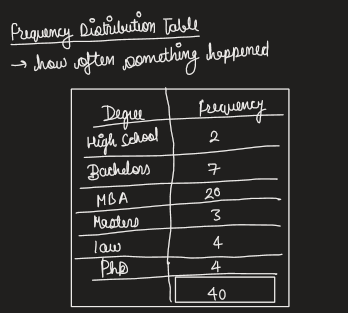

In [6]:
data.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

<AxesSubplot:>

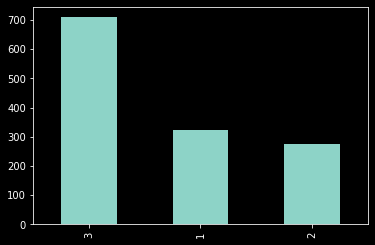

In [7]:
# bar chart
data.pclass.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='pclass'>

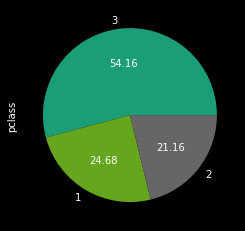

In [17]:
# pie chart 
data.pclass.value_counts().plot(kind='pie', autopct='%.2f', colormap='Dark2')


#### Cummulative Frequency
- no of times event occurs in the given scenario <br><br>
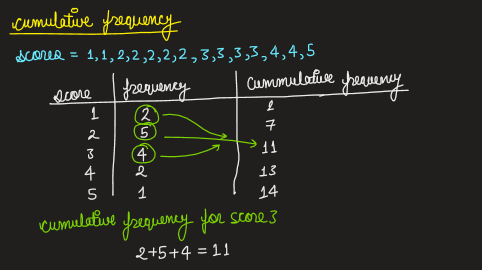

In [20]:
a= data.pclass.value_counts()
a

3    709
1    323
2    277
Name: pclass, dtype: int64

In [21]:
# convert it into %-tage
a/=a.sum()
a*=100
a


3    54.163484
1    24.675325
2    21.161192
Name: pclass, dtype: float64

In [22]:
# now total will be 100
a.sum()

100.0

In [23]:
cf_p= [] # cummulative frequency %-age
cf=0
for i in a:
    cf+=i
    cf_p.append(cf)

cf_p

[54.163483575248286, 78.83880825057295, 100.0]

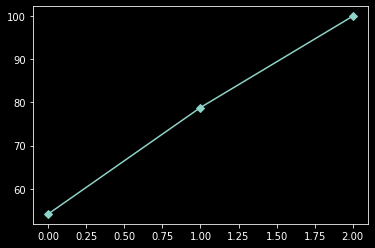

In [27]:
plt.plot(cf_p, marker='D')

In [35]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [42]:
x= data.sex.value_counts()
x/=x.sum()
x*=100
x

male      64.400306
female    35.599694
Name: sex, dtype: float64

In [43]:
c= []
j=0
for i in x:
    j+=i
    c.append(j)
c

[64.40030557677616, 100.0]

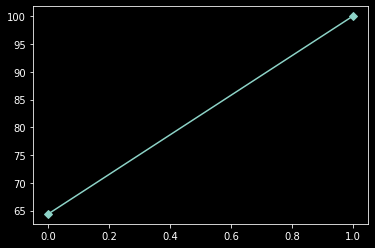

In [46]:
plt.plot(c, marker= 'D')

# Numerical Data

In [47]:
data.age.value_counts()

24.0000    47
22.0000    43
21.0000    41
30.0000    40
18.0000    39
           ..
0.3333      1
22.5000     1
70.5000     1
0.6667      1
26.5000     1
Name: age, Length: 98, dtype: int64

In [49]:
ages= data.age.values
ages.shape

(1309,)

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.1667 ,  8.15003, 16.13336, 24.11669, 32.10002, 40.08335,
        48.06668, 56.05001, 64.03334, 72.01667, 80.     ]),
 <BarContainer object of 10 artists>)

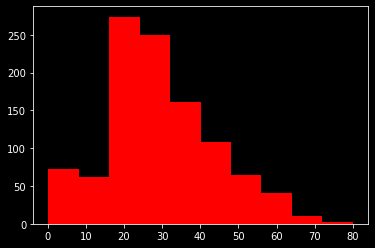

In [51]:
# Histograms
plt.hist(ages, color='red')

<AxesSubplot:xlabel='age'>

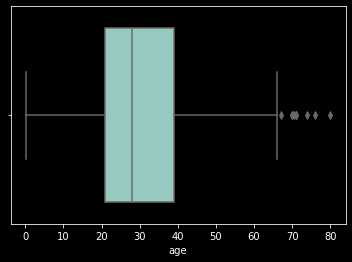

In [54]:
# boxplot
sns.boxplot('age', data=data)

In [56]:
data.age.median()

28.0

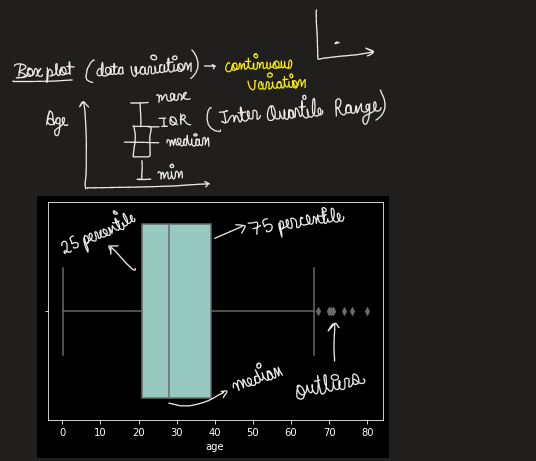

<AxesSubplot:xlabel='age', ylabel='Density'>

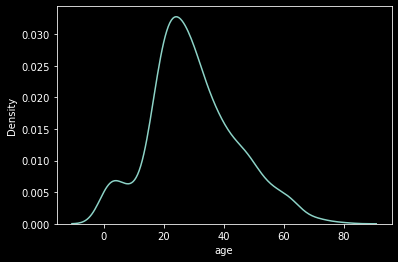

In [57]:
# KDEplot
sns.kdeplot(data.age)

# **`Bivariate Analysis`**



# 1. Categorical v/s Numerical 

<AxesSubplot:xlabel='pclass', ylabel='age'>

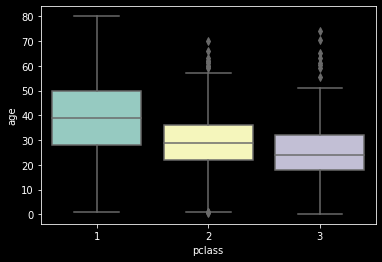

In [62]:
# Box Plot
sns.boxplot(x='pclass', y='age', data=data)

<AxesSubplot:xlabel='pclass', ylabel='age'>

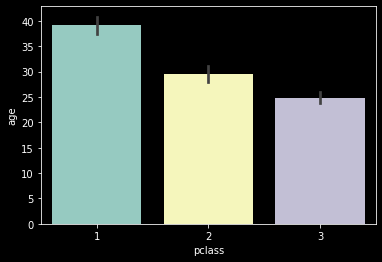

In [63]:
# Bar Plot
sns.barplot(x='pclass', y='age', data=data) # lekin ye average batayega, like class 3 m on-average 25 years k log the


# 2. Numerical v/s Numerical

In [64]:
data.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1236,3,1,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.225,NaN,S,13,NaN,NaN
409,2,0,"Fox, Mr. Stanley Hubert",male,36.0,0,0,229236,13.000,NaN,S,NaN,236.0,"Rochester, NY"
172,1,0,"Julian, Mr. Henry Forbes",male,50.0,0,0,113044,26.000,E60,S,NaN,NaN,London
758,3,1,"de Messemaeker, Mr. Guillaume Joseph",male,36.5,1,0,345572,17.400,NaN,S,15,NaN,"Tampico, MT"
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S,NaN,NaN,"New York, NY"


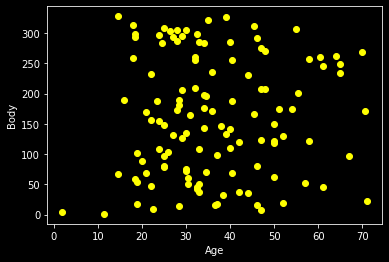

In [71]:
# scatter plot
body= data.body.values
age= data.age.values

plt.scatter(y=body, x=age, c='yellow')
plt.xlabel('Age')
plt.ylabel('Body')
plt.show()

# 3. Categorical v/s Categorical

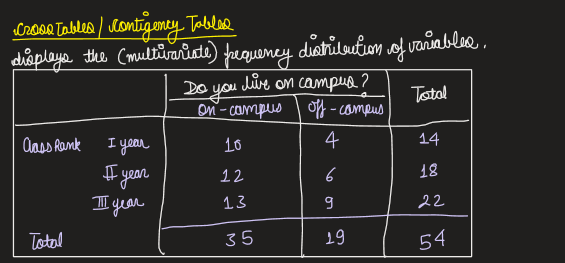

In [76]:
# contigency tables

cross_table= pd.crosstab(data.pclass, data.sex)
cross_table

sex,female,male
pclass,,
1,144,179
2,106,171
3,216,493


<AxesSubplot:xlabel='pclass'>

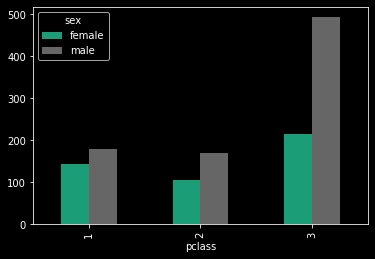

In [82]:
# bar plot
cross_table.plot(kind='bar', colormap='Dark2')


<AxesSubplot:xlabel='sex', ylabel='pclass'>

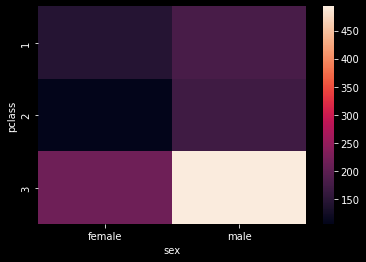

In [83]:
# heat map

sns.heatmap(cross_table)